Author- Prudhvi Malladi


GRIP - THE SPARKS FOUNDATION
DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

(BATCH - MAY 2021)

Prediction using Supervised ML
Task-1 Predict the percentage of an student based on the number of study hours.
In this regression task we will predict the percentage of marks that a student expected to score based on the number of hours he studied. This is simple linear regression task as it involves only two variables.



To predict¶


What will be predicted score if a student studies for 9.25 hrs/day

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
DataPath= "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
Data= pd.read_csv(DataPath)

In [63]:
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [64]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [65]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


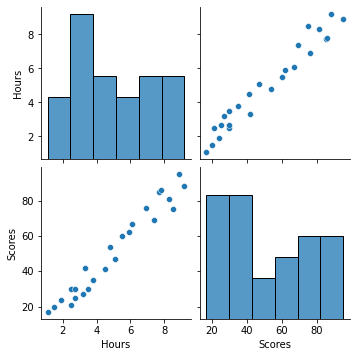

In [67]:
sns.pairplot(Data)

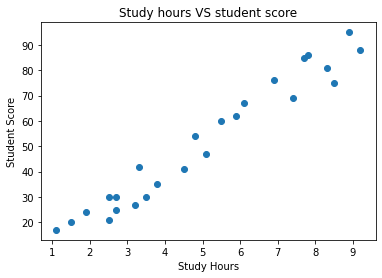

In [14]:
plt.scatter(x=Data.Hours,y=Data.Scores)
plt.xlabel("Study Hours")
plt.ylabel("Student Score")
plt.title("Study hours VS student score")
plt.show()


In [16]:
Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [37]:
x=Data.drop(['Scores'],axis=1)
y=Data.drop(['Hours'],axis=1)
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state = 100 , test_size = 0.3)

In [38]:
LR=LinearRegression()

In [39]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:

LR.coef_

array([[9.87171443]])

In [41]:
LR.intercept_

array([1.49514211])

In [42]:
y_pred=LR.predict(x_test)
y_pred

array([[28.14877107],
       [39.00765694],
       [34.07179972],
       [59.73825724],
       [16.30271375],
       [74.54582888],
       [69.60997167],
       [48.87937137]])

In [43]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["Study_Hours","Student_original_Scores","Student_scores_predicted"])

,Study_Hours,Student_original_Scores,Student_scores_predicted
0,2.7,25.0,28.148771
1,3.8,35.0,39.007657
2,3.3,42.0,34.071800
3,5.9,62.0,59.738257
4,1.5,20.0,16.302714
5,7.4,69.0,74.545829
6,6.9,76.0,69.609972
7,4.8,54.0,48.879371


In [44]:
LR.score(x_test,y_test)


0.9309458862687437

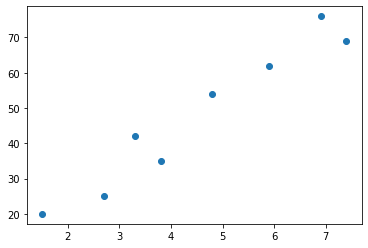

In [45]:
plt.scatter(x_test,y_test)

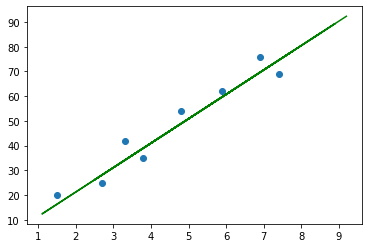

In [46]:
plt.scatter(x_test,y_test)
plt.plot(x_train,LR.predict(x_train),color="Green")

Joblib is a set of tools to provide lightweight pipelining in Python. In particular: transparent disk-caching of functions and lazy re-evaluation (memoize pattern) easy simple parallel computing.

In [47]:
import joblib as jb
jb.dump(LR,"Student_score_predict")

['Student_score_predict']

In [48]:
model=jb.load("Student_score_predict")

In [49]:
model.predict([[9.25]])

array([[92.80850057]])

In [50]:

print("shape of x",x.shape)

print("shape of y",y.shape)

shape of x (25, 1)
shape of y (25, 1)
